In [1]:
#importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

Dataset 1

In [2]:
price=pd.read_csv('EV_cars_India_2023.csv')
price.head(5)

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [3]:
#data cleaning
def convert_to_lakh(price_range):
    if 'lakh' in price_range:
        return float(re.findall(r'\d+\.\d+', price_range)[0])
    elif 'cr' in price_range:
        return float(re.findall(r'\d+\.\d+', price_range)[0]) * 100
    elif '-' in price_range:
        min_price, max_price = map(float, re.findall(r'\d+\.\d+', price_range))
        return (min_price + max_price) / 2

def correction(value):
    if value<5:
        value=value*100
        return value
    else:
        return value    
def extract_numbers(text):
    numbers = re.findall(r'\d+\.\d+|\d+', text)
    if numbers:
        return int(numbers[0])  # Convert to int
    else:
        return None
price['Drive_range']=price['Drive_range'].apply(extract_numbers)   
price['Car_price'] = price['Car_price'].apply(convert_to_lakh)
price['Car_price'] = price['Car_price'].apply(correction)

In [4]:
#data sorting
sorted_price = price.sort_values(by='Car_price')
cheap_car = sorted_price[['Car_name', 'Car_price','Drive_range']].head(10)
drive_range = price.sort_values(by='Drive_range')
less_range = sorted_price[['Car_name', 'Car_price','Drive_range']].head(10)
cheap_car

,Car_name,Car_price,Drive_range
0,MG Comet EV,7.98,230
1,Tata Tiago EV,8.69,250
14,Mahindra E Verito,9.13,375
23,Citroen eC3,11.50,372
2,Tata Tigor EV,12.49,315
16,Tata Nexon EV Prime,14.49,415
6,Mahindra XUV400 EV,15.99,375
7,Tata Nexon EV Max,16.49,453
3,MG ZS EV,23.38,461
5,Hyundai Kona Electric,23.84,452


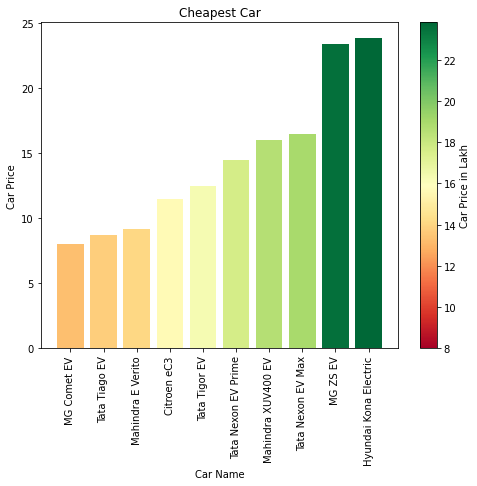

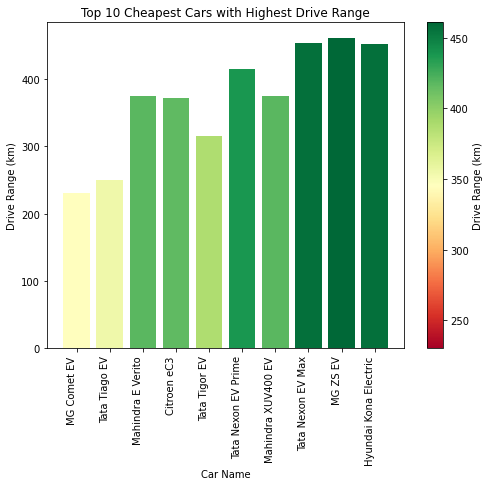

In [5]:
#displaying graph
colormap = cm.get_cmap('RdYlGn')
plt.figure(figsize=(8, 6))
bars = plt.bar(cheap_car['Car_name'], cheap_car['Car_price'], color=colormap(cheap_car['Car_price'] / cheap_car['Car_price'].max()))
plt.xlabel('Car Name')
plt.ylabel('Car Price')
plt.title('Cheapest Car')
plt.xticks(rotation=90)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=cheap_car['Car_price'].min(), vmax=cheap_car['Car_price'].max()))
sm.set_array([])  # Remove the data from the ScalarMappable
cbar = plt.colorbar(sm)
cbar.set_label('Car Price in Lakh')
plt.show()
#drive range
colormap = cm.get_cmap('RdYlGn')
plt.figure(figsize=(8, 6))
bars = plt.bar(less_range['Car_name'], less_range['Drive_range'], color=colormap(less_range['Drive_range'] / less_range['Drive_range'].max()))
plt.xlabel('Car Name')
plt.ylabel('Drive Range (km)')
plt.title('Top 10 Cheapest Cars with Highest Drive Range')
plt.xticks(rotation=90, ha="right")
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=less_range['Drive_range'].min(), vmax=less_range['Drive_range'].max()))
sm.set_array([])  # Remove the data from the ScalarMappable
cbar = plt.colorbar(sm)
cbar.set_label('Drive Range (km)')
plt.show()

In [6]:
#data sorting
costly_car = sorted_price[['Car_name', 'Car_price','Drive_range']].tail(10)
high_range = sorted_price[['Car_name', 'Car_price','Drive_range']].tail(10)
costly_car

,Car_name,Car_price,Drive_range
22,Audi e-tron,102.0,708
25,Jaguar I-Pace,120.0,270
19,BMW iX,120.0,372
12,Porsche Taycan,153.0,521
8,Mercedes-Benz EQS,159.0,230
9,Audi e-tron GT,170.0,250
13,Audi RS e-tron GT,190.0,452
20,BMW i7,190.0,590
15,Strom Motors R3,450.0,453
27,PMV EaS E,479.0,388


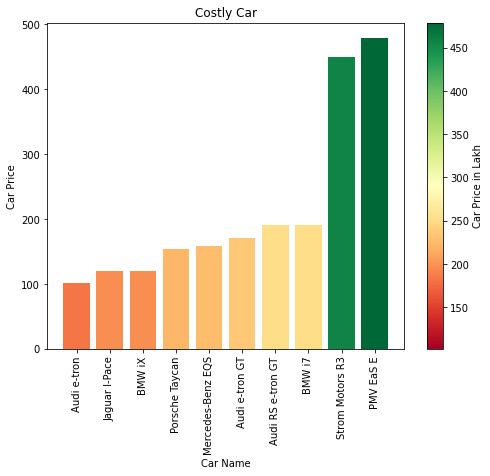

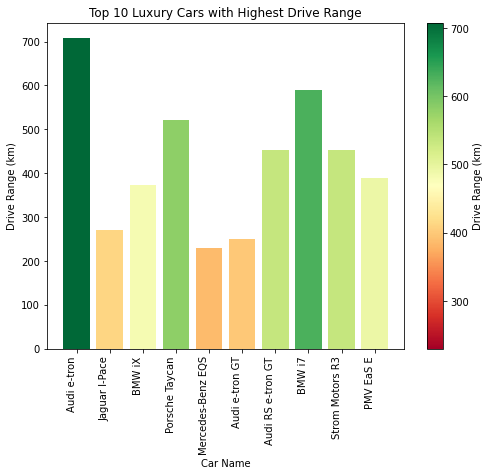

In [7]:
#displaying graph
colormap = cm.get_cmap('RdYlGn')
plt.figure(figsize=(8, 6))
bars = plt.bar(costly_car['Car_name'], costly_car['Car_price'], color=colormap(costly_car['Car_price'] / costly_car['Car_price'].max()))
plt.xlabel('Car Name')
plt.ylabel('Car Price')
plt.title('Costly Car')
plt.xticks(rotation=90)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=costly_car['Car_price'].min(), vmax=costly_car['Car_price'].max()))
sm.set_array([])  # Remove the data from the ScalarMappable
cbar = plt.colorbar(sm)
cbar.set_label('Car Price in Lakh')
plt.show()
#drive
plt.figure(figsize=(8, 6))
bars = plt.bar(high_range['Car_name'], high_range['Drive_range'], color=colormap(high_range['Drive_range'] / high_range['Drive_range'].max()))
plt.xlabel('Car Name')
plt.ylabel('Drive Range (km)')
plt.title('Top 10 Luxury Cars with Highest Drive Range')
plt.xticks(rotation=90, ha="right")
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=high_range['Drive_range'].min(), vmax=high_range['Drive_range'].max()))
sm.set_array([])  # Remove the data from the ScalarMappable
cbar = plt.colorbar(sm)
cbar.set_label('Drive Range (km)')
plt.show()

Dataset 2

In [8]:
#loading data
charging=pd.read_csv('ev-charging-stations-india.csv')
charging.head(5)

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [9]:
#unique values in data
charging.state.unique()

array(['Haryana', 'Rajasthan', 'Uttar Pradesh', 'Himachal Pradesh',
       'Maharashtra', 'Delhi', 'Tamil Nadu', 'Uttarakhand', 'Gujarat',
       'Goa', 'Telangana', 'Karnataka', 'Punjab', 'Jammu and Kashmir',
       'Odisha', 'Pondicherry', 'TamilNadu', 'Uttrakhand', 'WestBengal',
       'Harayana', 'Chandigarh', 'Hyderabadu00a0', 'Kerala',
       'AndhraPradesh', 'TamiNadu', 'Jharkhand', 'Bihar', 'West Bengal',
       'Jammu', 'Andhra Pradesh', 'Chhattisgarh', 'Madhya Pradesh',
       'Andhra pradesh', 'Puducherry', 'Jammu & Kashmir', 'Assam',
       'Sikkim', 'Uttarakhand ', 'TAMIL NADU', 'Andhra Pradesh ',
       'Bhubhaneswar', 'Chattisgarh', 'chattisgarh', 'Chikhali',
       'Delhi NCR', 'Ernakulam', 'Hisar', 'Hyderabad', 'Jajpur', 'Kochi',
       'Limbdi', 'Maharashra', 'PUNJAB', 'Rajahmundry', 'TELENGANA',
       'Uttarkhand', 'Andra Pradesh', 'Karala', 'Tripura', 'Andaman'],
      dtype=object)

In [10]:
#number of unique values
charging.state.nunique()

60

In [11]:
#data cleaning
charging['state'].replace(to_replace={'Hyderabadu00a0': 'Hyderabad', 'Uttrakhand': 'Uttarakhand',
                                              'Karala': 'Kerala','AndhraPradesh':'Andhra Pradesh',
                                              'TamiNadu': 'Tami Nadu', 'Jammu': 'Jammu & Kashmir',
                                              'TAMIL NADU': 'Tami Nadu', 'Uttrakhand ': 'Uttarakhand',
                                              'Delhi NCR': 'Delhi', 'PUNJAB': 'Punjab',
                                              'TELENGANA': 'Telengana', 'Uttarkhand': 'Uttarakhand'}, inplace=True)


In [12]:
#sorting data state wise
grouped = charging.groupby(['state']).size().reset_index(name='count')
grouped = grouped.sort_values(by='count', ascending=False)
# Print the result
print(grouped)

                state  count
31        Maharashtra    259
12              Delhi    179
40         Tamil Nadu    155
25          Karnataka    134
26             Kerala     92
45      Uttar Pradesh     87
15            Gujarat     77
42          Telangana     75
37          Rajasthan     68
17            Haryana     60
48        West Bengal     53
32             Odisha     38
1      Andhra Pradesh     32
46        Uttarakhand     24
35             Punjab     24
3      Andhra pradesh     24
24          Jharkhand     22
39          Tami Nadu     21
29     Madhya Pradesh     20
10       Chhattisgarh     12
5               Assam     10
7               Bihar      9
14                Goa      8
41          TamilNadu      7
22    Jammu & Kashmir      6
18   Himachal Pradesh      6
43          Telengana      5
30         Maharashra      5
9         Chattisgarh      4
49         WestBengal      3
38             Sikkim      2
34         Puducherry      2
47       Uttarakhand       2
50        chat

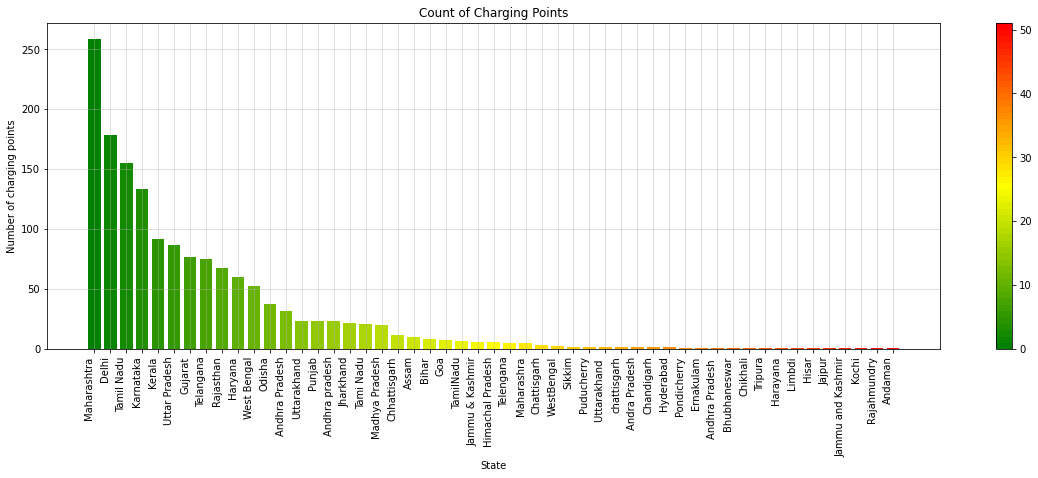

In [13]:
#displaying graph
# Create a custom colormap
colors = [(0, 'green'), (0.5, 'yellow'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(grouped))

# Plot the sorted data on a bar graph with the custom colormap
plt.figure(figsize=(20, 6))
bars = plt.bar(grouped['state'],grouped['count'], color=cmap(range(len(grouped))))
plt.xlabel('State')
plt.ylabel('Number of charging points')
plt.title('Count of Charging Points')
plt.xticks(rotation=90, ha="right")

# Add a color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(grouped)))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.grid(True, alpha=0.5)
plt.show()


Dataset 3

In [14]:
#loading data
df_price=pd.read_csv('india_fuel_prices.csv')
df_price.rename(columns={'Unnamed: 0': 'city'}, inplace=True)
df_price['diesel']=[float(price.split(' ')[0]) for price in df_price['diesel']]
df_price['petrol']=[float(price.split(' ')[0]) for price in df_price['petrol']]
df_price.head(5)

,city,diesel,petrol
0,Adilabad,99.84,111.83
1,Agar Malwa,94.89,109.70
2,Agra,89.80,96.63
3,Ahmadnagar,93.03,106.53
4,Ahmedabad,92.17,96.42


In [15]:
#data cleaning by including only capital of state
indian_state_capitals = [
    'Amravati','Itanagar','Dispur','Patna','Raipur','Panaji','Gandhi Nagar','Chandigarh','Shimla','Ranchi',
    'Bangalore','Thiruvananthapuram','Bhopal','Mumbai City','Imphal','Shillong','Aizawl','Kohima',
    'Bhubaneswar','Chandigarh','Jaipur','Gangtok','Chennai','Hyderabad','Agartala','Lucknow','Dehradun',
    'Kolkata','Chandigarh','Lakshadweep','New Delhi','Puducherry','Leh','Srinagar', 
]
df_price = df_price[df_price['city'].isin(indian_state_capitals)][['city', 'petrol', 'diesel']]
petrol_sorted=df_price[['city','petrol']].sort_values(by='petrol')
diesel_sorted=df_price[['city','diesel']].sort_values(by='diesel')

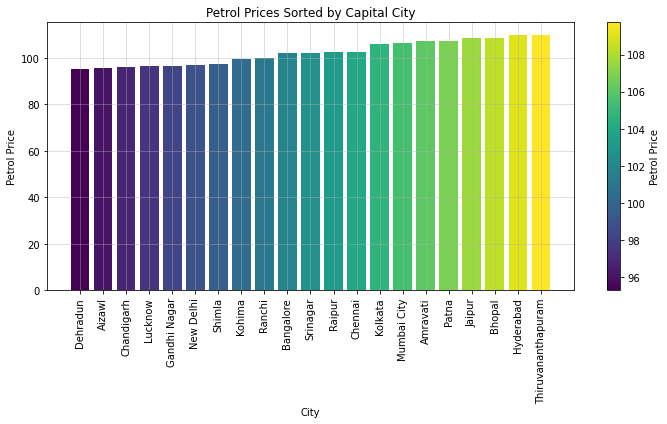

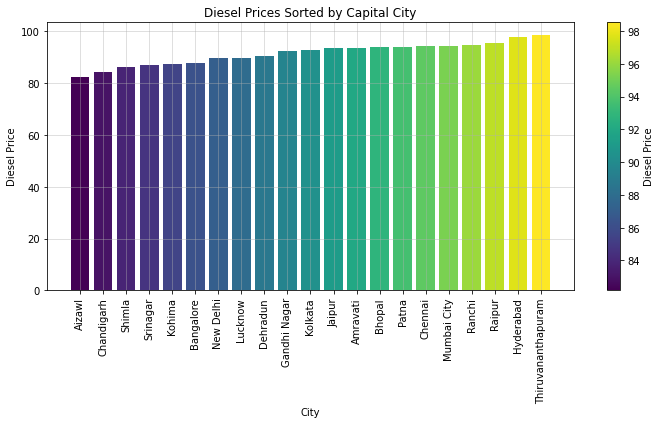

In [16]:
#displaying graph
colors = plt.cm.viridis(np.linspace(0, 1, len(petrol_sorted)))
plt.figure(figsize=(10, 6))
plt.bar(petrol_sorted['city'], petrol_sorted['petrol'], color=colors)
plt.xlabel('City')
plt.ylabel('Petrol Price')
plt.title('Petrol Prices Sorted by Capital City')
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=petrol_sorted['petrol'].min(), vmax=petrol_sorted['petrol'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Petrol Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()
#diesel
colors = plt.cm.viridis(np.linspace(0, 1, len(diesel_sorted)))
plt.figure(figsize=(10, 6))
plt.bar(diesel_sorted['city'], diesel_sorted['diesel'], color=colors)
plt.xlabel('City')
plt.ylabel('Diesel Price')
plt.title('Diesel Prices Sorted by Capital City')
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=diesel_sorted['diesel'].min(), vmax=diesel_sorted['diesel'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Diesel Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

Dataset 4

In [17]:
#loading data
fuel=pd.read_csv('Fuel type Registration of Vehicles.csv')
fuel.head(5)

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG
0,Jan-14,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0
1,Feb-14,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0
2,Mar-14,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0
3,Apr-14,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0
4,May-14,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0


In [18]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               115 non-null    object
 1   CNG ONLY            115 non-null    int64 
 2   DIESEL              115 non-null    int64 
 3   DIESEL/HYBRID       115 non-null    int64 
 4   DUAL DIESEL/CNG     115 non-null    int64 
 5   ELECTRIC(BOV)       115 non-null    int64 
 6   ETHANOL             115 non-null    int64 
 7   LPG ONLY            115 non-null    int64 
 8   NOT APPLICABLE      115 non-null    int64 
 9   PETROL              115 non-null    int64 
 10  PETROL/CNG          115 non-null    int64 
 11  PETROL/ETHANOL      115 non-null    int64 
 12  PETROL/HYBRID       115 non-null    int64 
 13  PETROL/LPG          115 non-null    int64 
 14  SOLAR               115 non-null    int64 
 15  FUEL CELL HYDROGEN  115 non-null    int64 
 16  LNG                 115 no

In [19]:
#data preprocessing
fuel_1=fuel[['Month','CNG ONLY','LPG ONLY','PETROL/CNG','PETROL/LPG']]
fuel_1.head(5)

,Month,CNG ONLY,LPG ONLY,PETROL/CNG,PETROL/LPG
0,Jan-14,2103,188,20623,6307
1,Feb-14,1607,116,15266,4803
2,Mar-14,2026,106,18800,5609
3,Apr-14,1718,121,19714,5600
4,May-14,1727,103,20626,6317


In [20]:
#data preprocessing
fuel_2=fuel[['Month','DIESEL','ELECTRIC(BOV)','PETROL']]
fuel_2.head(5)

,Month,DIESEL,ELECTRIC(BOV),PETROL
0,Jan-14,270915,232,1347016
1,Feb-14,219601,171,1176669
2,Mar-14,258723,220,1329273
3,Apr-14,222632,252,1296500
4,May-14,237336,186,1408836


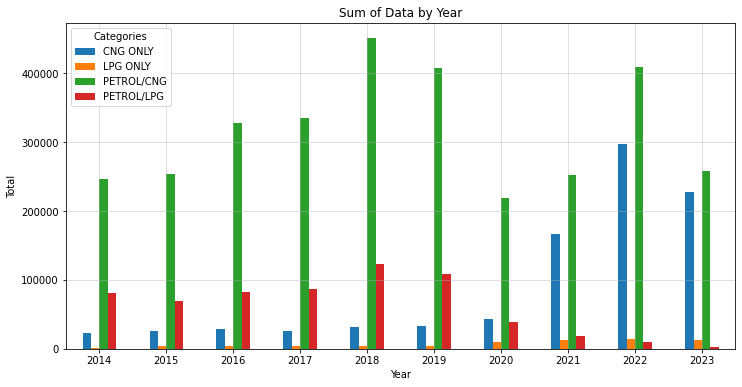

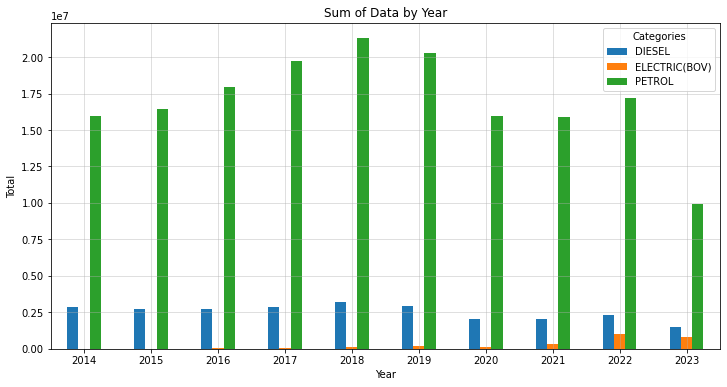

In [21]:
#displaying graph
# Extract the year from the 'Month' column
fuel_1['Year'] = pd.to_datetime(fuel_1['Month'], format='%b-%y').dt.year
# Group by 'Year' and calculate the sum for each year
sum_by_year = fuel_1.groupby('Year').sum()
# Plot the summed data on a graph
sum_by_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Sum of Data by Year')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.grid(True, alpha=0.5)
plt.show()
#for 2nd graph
# Extract the year from the 'Month' column
fuel_2['Year'] = pd.to_datetime(fuel_2['Month'], format='%b-%y').dt.year
# Group by 'Year' and calculate the sum for each year
sum_by_year = fuel_2.groupby('Year').sum()
# Plot the summed data on a graph
sum_by_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Sum of Data by Year')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.grid(True, alpha=0.5)
plt.show()

Dataset 5

In [22]:
#loading data
review=pd.read_csv('4-wheeler-EV-carwale.csv')
review.head(5)

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


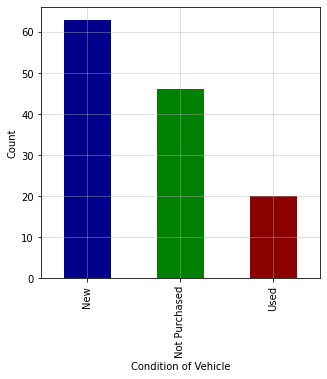

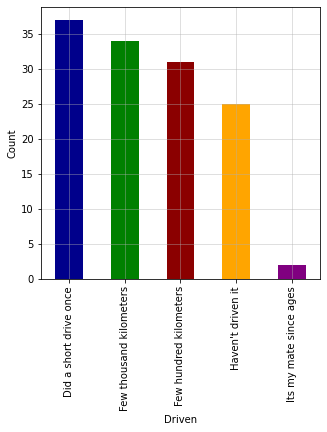

In [23]:
#displaying graph
colors = ['darkblue', 'green', 'darkred','orange','purple']
plt.figure(figsize=(5, 5))
review.Condition.value_counts().plot(kind='bar',color=colors)
plt.xlabel('Condition of Vehicle')
plt.ylabel('Count')
plt.grid(True, alpha=0.5)
plt.show()
#driven
plt.figure(figsize=(5, 5))
review.driven.value_counts().plot(kind='bar', color=colors)
plt.xlabel('Driven')
plt.ylabel('Count')
plt.grid(True, alpha=0.5)
plt.show()

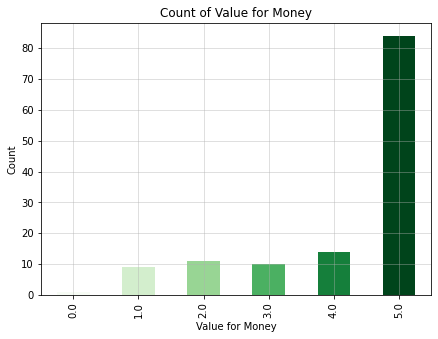

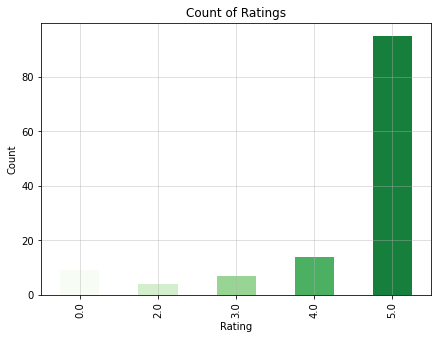

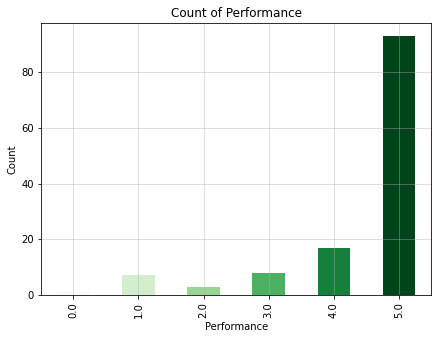

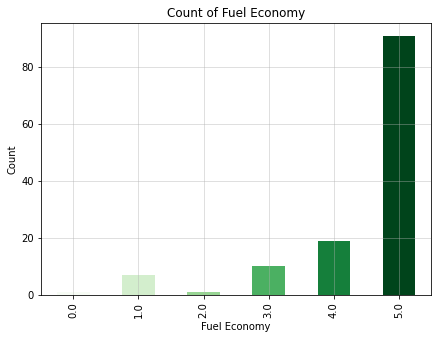

In [24]:
#displaying graph
value_counts = review['Value for Money'].value_counts().sort_index()
# Define colors for the bars
cmap = plt.cm.get_cmap('Greens', len(value_counts))
plt.figure(figsize=(7, 5))
value_counts.plot(kind='bar', color=cmap(np.arange(len(value_counts))))
plt.xlabel('Value for Money')
plt.ylabel('Count')
plt.title('Count of Value for Money')
plt.grid(True, alpha=0.5)
plt.show()
#rating
rating_counts = review['rating'].value_counts().sort_index()
plt.figure(figsize=(7, 5))
rating_counts.plot(kind='bar',color=cmap(np.arange(len(rating_counts))))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.grid(True, alpha=0.5)
plt.show()
#performance
performance_counts = review['Performance'].value_counts().sort_index()
plt.figure(figsize=(7, 5))
performance_counts.plot(kind='bar',color=cmap(np.arange(len(performance_counts))))
plt.xlabel('Performance')
plt.ylabel('Count')
plt.title('Count of Performance')
plt.grid(True, alpha=0.5)
plt.show()
#fuel economy
economy_counts = review['Fuel Economy'].value_counts().sort_index()
plt.figure(figsize=(7, 5))
economy_counts.plot(kind='bar', color=cmap(np.arange(len(economy_counts))))
plt.xlabel('Fuel Economy')
plt.ylabel('Count')
plt.title('Count of Fuel Economy')
plt.grid(True, alpha=0.5)
plt.show()

Dataset 6

In [25]:
#loading data
charging=pd.read_csv('ChargingRecords.csv')
charging.head(5)

,UserID,ChargerID,ChargerCompany,Location,ChargerType,StartDay,StartTime,EndDay,EndTime,StartDatetime,EndDatetime,Duration,Demand
0,0,1,1,hotel,0,2022-09-15,20:54:02,2022-09-15,23:59:13,2022-09-15 20:54,2022-09-15 23:59,185,20.36
1,0,1,1,hotel,0,2022-09-14,20:01:05,2022-09-14,21:31:04,2022-09-14 20:01,2022-09-14 21:31,90,10.19
2,0,1,1,hotel,0,2022-09-14,18:54:30,2022-09-14,19:54:29,2022-09-14 18:54,2022-09-14 19:54,60,6.78
3,0,1,1,hotel,0,2022-09-29,18:32:51,2022-09-30,0:16:42,2022-09-29 18:32,2022-09-30 0:16,344,37.65
4,0,1,1,hotel,0,2022-09-25,19:30:15,2022-09-26,0:30:14,2022-09-25 19:30,2022-09-26 0:30,300,33.81


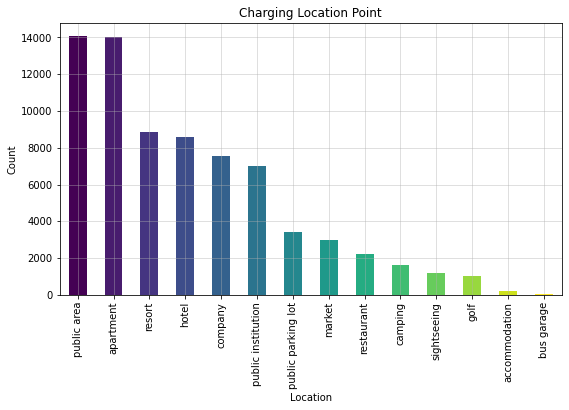

In [26]:
#displaying graph
counts=charging.Location.value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
# Plot the bar graph with different colors
plt.figure(figsize=(9, 5))
counts.plot(kind='bar', color=colors)
# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Charging Location Point')
plt.grid(True, alpha=0.5)
plt.show()

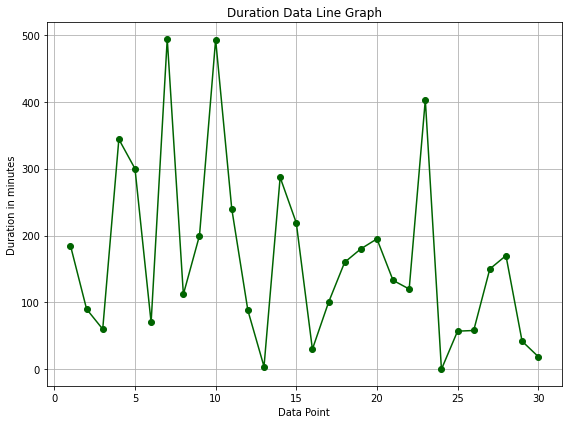

In [27]:
#displaying graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(charging.Duration.unique()[:30]) + 1), charging.Duration.unique()[:30], marker='o', linestyle='-', color='darkgreen')
# Add labels and title
plt.xlabel('Data Point')
plt.ylabel('Duration in minutes')
plt.title('Duration Data Line Graph')        
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Dataset 7

In [28]:
#loading data
df=pd.read_csv('Indian automoble buying behavour study 1.0.csv')
df=df.rename(columns={'Price':'EV_Price'})
df=df.drop('Make',axis=1)
df.head(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  EV_Price          99 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 9.4+ KB


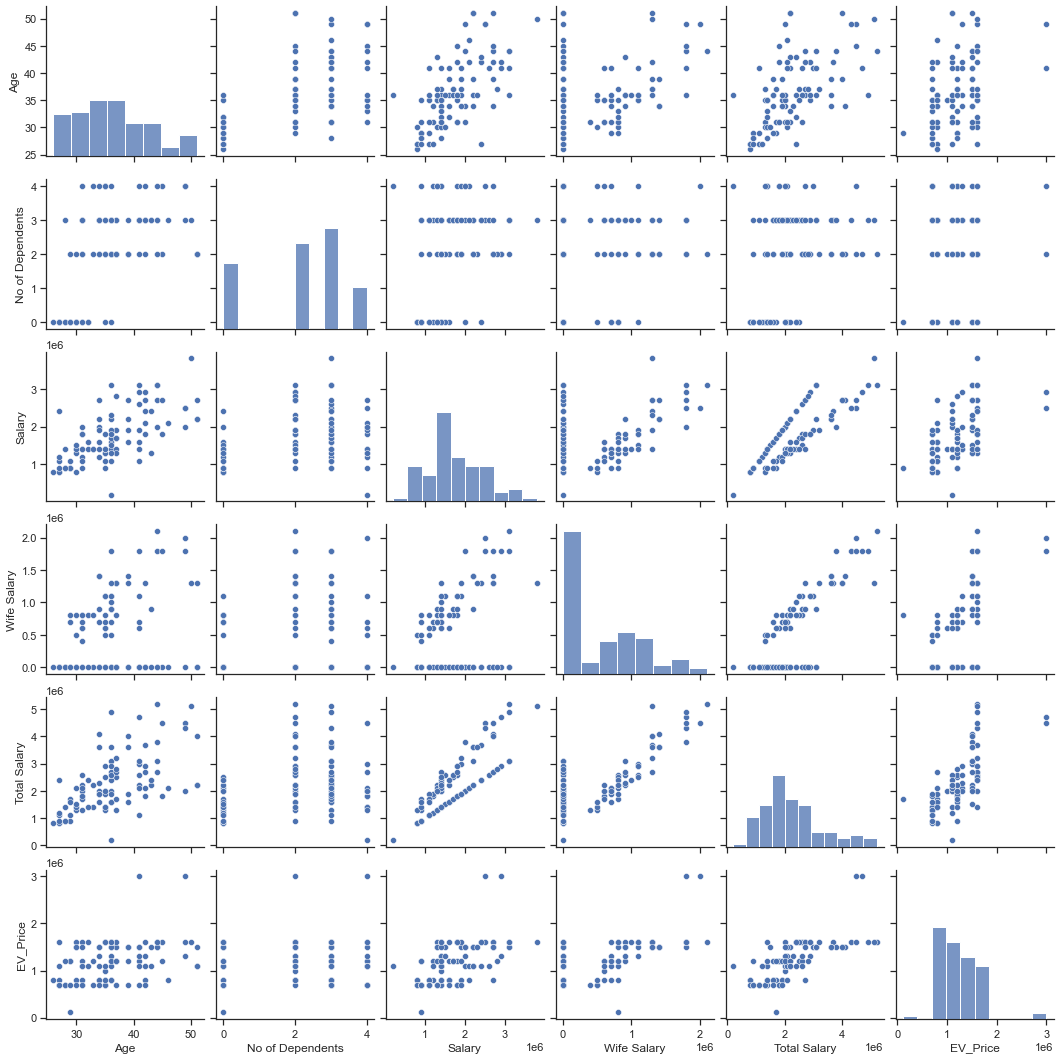

In [30]:
#pairplot
sns.set(style="ticks")
sns.pairplot(df)

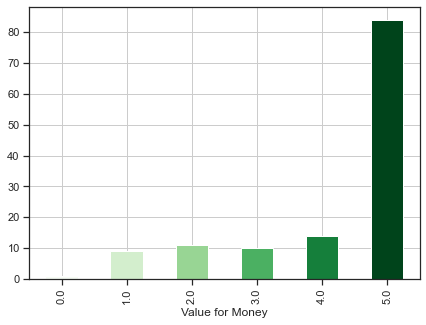

In [31]:
#displaying graph
cmap = plt.cm.get_cmap('Greens', len(value_counts))
# Plot the bar graph with different colors
plt.figure(figsize=(7, 5))
value_counts.plot(kind='bar', color=cmap(np.arange(len(value_counts))))
plt.grid(True)

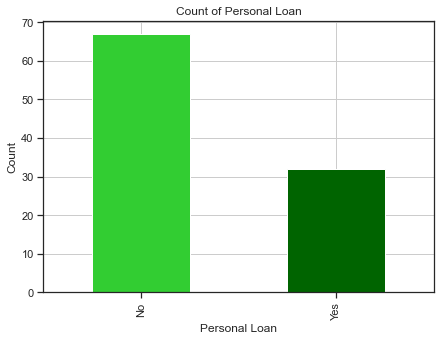

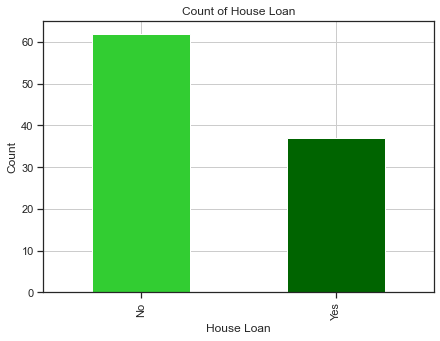

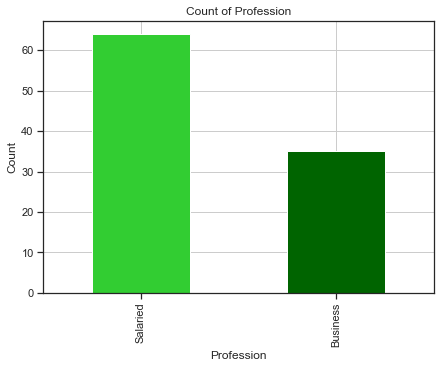

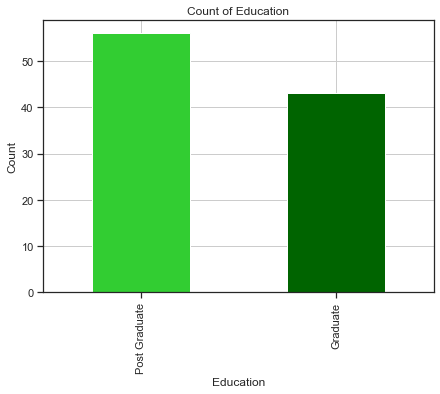

In [32]:
#displaying graph
# Define colors for the bars
colors = ['limegreen','darkgreen',]
plt.figure(figsize=(7, 5))
df['Personal loan'].value_counts().plot(kind='bar', color=colors)
# Add labels and title
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title('Count of Personal Loan')
plt.grid(True)
plt.show()
#House Loan
plt.figure(figsize=(7, 5))
df['House Loan'].value_counts().plot(kind='bar', color=colors)
# Add labels and title
plt.xlabel('House Loan')
plt.ylabel('Count')
plt.title('Count of House Loan')
plt.grid(True)
plt.show()
#profession
plt.figure(figsize=(7, 5))
df['Profession'].value_counts().plot(kind='bar', color=colors)
# Add labels and title
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Count of Profession')
plt.grid(True)
plt.show()
#education
plt.figure(figsize=(7, 5))
df['Education'].value_counts().plot(kind='bar', color=colors)
# Add labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Education')
plt.grid(True)
plt.show()

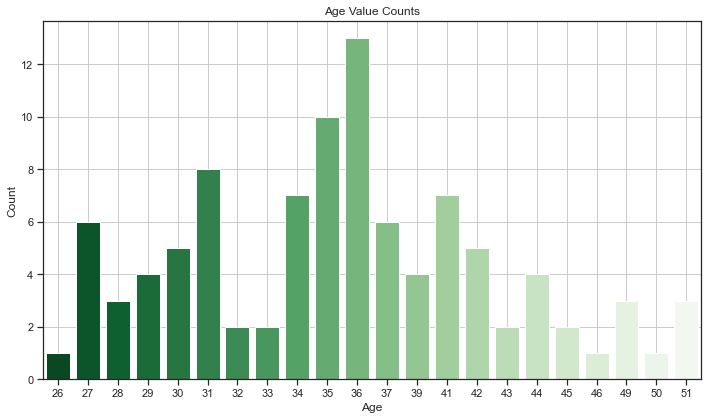

In [33]:
#displaying graph
age_counts = df['Age'].value_counts().sort_index()
custom_palette = sns.color_palette("Greens_r", n_colors=len(age_counts))
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette=custom_palette)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Value Counts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

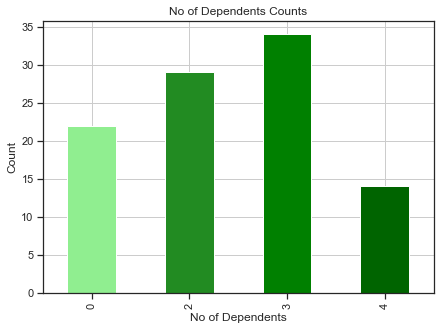

In [34]:
#displaying graph
colors=['lightgreen','forestgreen','green','darkgreen']
#No of Dependents
plt.figure(figsize=(7, 5))
df['No of Dependents'].value_counts().sort_index().plot(kind='bar', color=colors)
# Add labels and title
plt.xlabel('No of Dependents')
plt.ylabel('Count')
plt.title('No of Dependents Counts')
plt.grid(True)

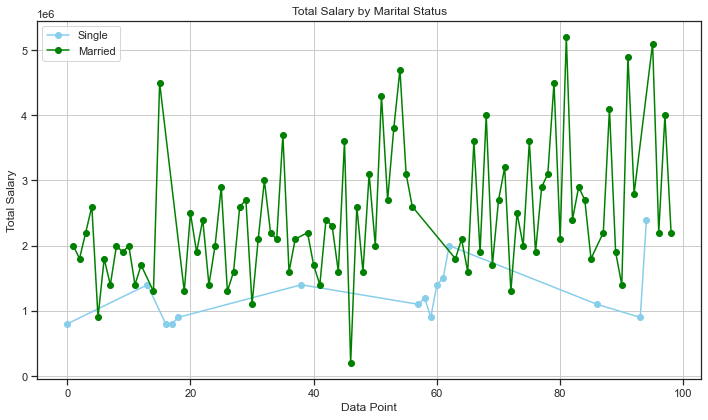

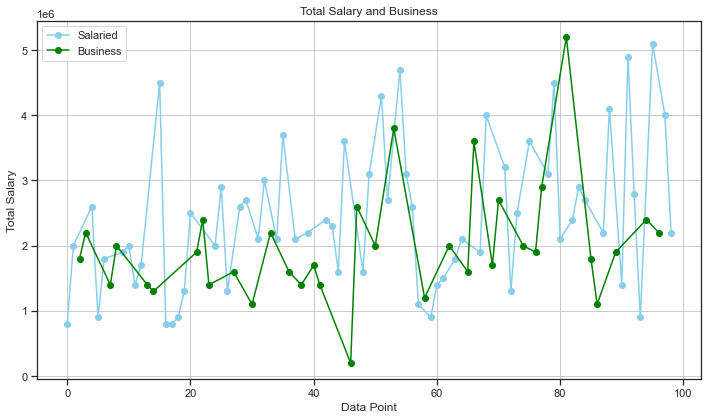

In [35]:
#displaying graph
# Filter data for Single and Married
single_df = df[df['Marrital Status'] == 'Single']
married_df = df[df['Marrital Status'] == 'Married']
# Create line plots for Single and Married
plt.figure(figsize=(10, 6))
plt.plot(single_df.index, single_df['Total Salary'], marker='o', linestyle='-', color='skyblue', label='Single')
plt.plot(married_df.index, married_df['Total Salary'], marker='o', linestyle='-', color='green', label='Married')
# Add labels and title
plt.xlabel('Data Point')
plt.ylabel('Total Salary')
plt.title('Total Salary by Marital Status')
# Add legend
plt.legend()
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()
# Filter data for Profession	
Salaried_df = df[df['Profession'] == 'Salaried']
Business_df = df[df['Profession'] == 'Business']
# Create line plots for Single and Married
plt.figure(figsize=(10, 6))
plt.plot(Salaried_df.index, Salaried_df['Total Salary'], marker='o', linestyle='-', color='skyblue', label='Salaried')
plt.plot(Business_df.index, Business_df['Total Salary'], marker='o', linestyle='-', color='green', label='Business')
# Add labels and title
plt.xlabel('Data Point')
plt.ylabel('Total Salary')
plt.title('Total Salary and Business')
# Add legend
plt.legend()
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()

In [36]:
#label encoding
col = [col for col in df.columns if df[col].dtype == 'object']
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encode specified columns
for column in col:
    df[column] = label_encoder.fit_transform(df[column])

In [37]:
df.head(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


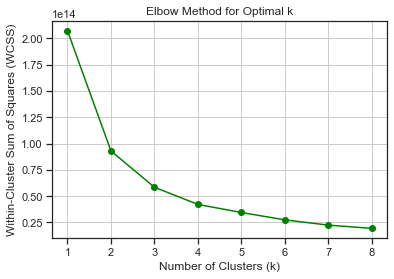

In [38]:
# Specify a range of values for the number of clusters (k)
k_values = range(1, 9)  # You can adjust this range based on your problem
# Calculate the Within-Cluster Sum of Squares (WCSS) for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.plot(k_values, wcss, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

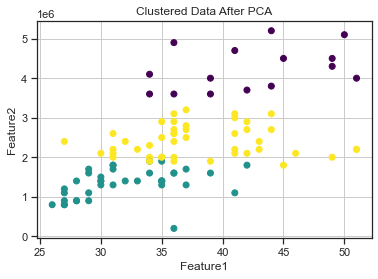

In [39]:
# Perform PCA to reduce dimensionality
n_components = 2  
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(df)
# Apply a clustering algorithm (e.g., K-Means) to the reduced data
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(reduced_data)
# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels
# Visualize the clustered data
plt.scatter(df['Age'], df['Total Salary'], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Clustered Data After PCA')
plt.grid(True)
plt.show()

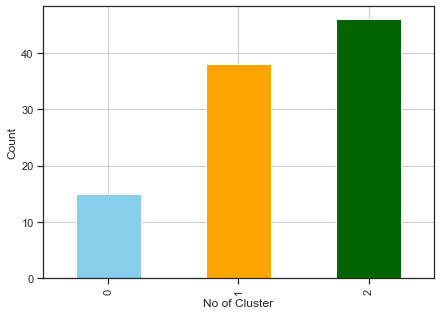

In [40]:
#displaying graph
colors=['skyblue','orange','darkgreen']
plt.figure(figsize=(7, 5))
df.Cluster.value_counts().sort_index().plot(kind='bar', color=colors)
# Add labels and title
plt.xlabel('No of Cluster')
plt.ylabel('Count')
plt.grid(True)

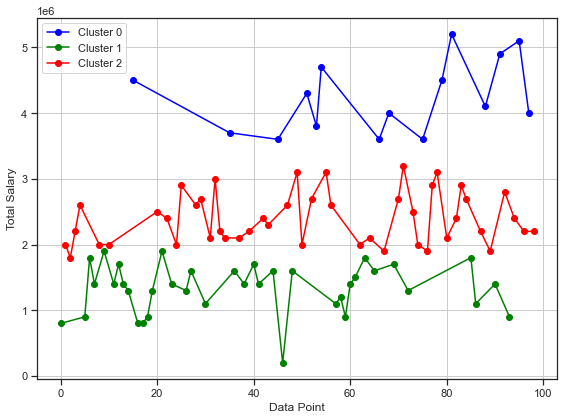

In [41]:
#displaying different clusters
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
plt.figure(figsize=(8, 6))
plt.plot(df0.index, df0['Total Salary'], marker='o', linestyle='-', color='blue', label='Cluster 0')
plt.plot(df1.index, df1['Total Salary'], marker='o', linestyle='-', color='green', label='Cluster 1')
plt.plot(df2.index, df2['Total Salary'], marker='o', linestyle='-', color='red', label='Cluster 2')
# Add labels and title
plt.xlabel('Data Point')
plt.ylabel('Total Salary')
# Add legend
plt.legend()
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()

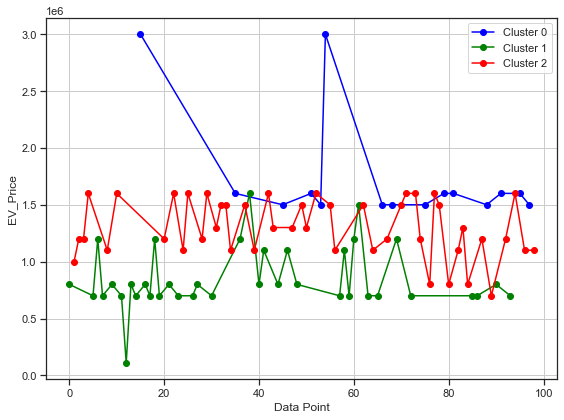

In [42]:
#displaying different clusters
plt.figure(figsize=(8, 6))
plt.plot(df0.index, df0['EV_Price'], marker='o', linestyle='-', color='blue', label='Cluster 0')
plt.plot(df1.index, df1['EV_Price'], marker='o', linestyle='-', color='green', label='Cluster 1')
plt.plot(df2.index, df2['EV_Price'], marker='o', linestyle='-', color='red', label='Cluster 2')
# Add labels and title
plt.xlabel('Data Point')
plt.ylabel('EV_Price')
# Add legend
plt.legend()
plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()

[Text(28.125, 0.5, 'AGE')]

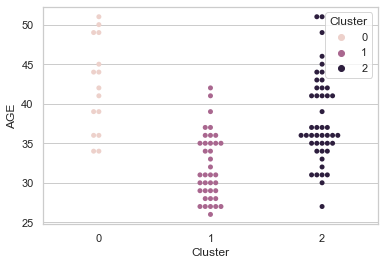

In [43]:
#displaying different clusters
sns.set_theme(style="whitegrid")
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Cluster", y="Age",hue='Cluster')
ax.set(ylabel="AGE")

In [44]:
#scaling data
X=df.drop(['Cluster'],axis=1)#features columns 
y=df['Cluster']#target column
scaler = MinMaxScaler()
# Fit the scaler to your data and transform the data
scaled_data = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.30, random_state = 0)
X_train.shape,X_test.shape

((69, 12), (30, 12))

In [45]:
#model training
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MultinomialNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    
    # Generate a classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(f'{model_name} Confusion Matrix:')
    print(cm)
    
    print('-' * 55)

Random Forest Accuracy: 0.97
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.89      1.00      0.94         8
           2       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

Random Forest Confusion Matrix:
[[ 5  0  0]
 [ 0  8  0]
 [ 0  1 16]]
-------------------------------------------------------
Logistic Regression Accuracy: 0.70
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.55      0.75      0.63         8
           2       0.75      0.71      0.73        17

    accuracy                           0.70        30
   macro avg       0.77      0.69      0.70        30
weighted avg       0.74 